In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.integrate import solve_ivp

from itertools import permutations, repeat

In [5]:
def calulate_uv_from_matrix(matrix,X,Y):
    vectors = np.dstack([X, Y]).reshape(-1, 2)
    u = []
    v = []
    u_temp = []
    v_temp = []
    counter = 0
    for vec in vectors:
        product = A @ vec
        u_temp.append(product[0])
        v_temp.append(product[1])
        counter = counter + 1
        if counter == len(X[0]):
            u.append(u_temp)
            v.append(v_temp)
            u_temp = []
            v_temp = []
            counter = 0

    u = np.array(u)
    v = np.array(v)
    return u,v

In [6]:
def draw_phase_portrait(matrix):
    A = matrix

    #Calculate the eigenvalues
    eigenvalues = LA.eigvals(A)
    print(eigenvalues)

    #Set the range
    x = np.arange(-1,1,0.1)
    y = np.arange(-1,1,0.1)
    X, Y = np.meshgrid(x, y)

    #calculate u and v based on the Matrix A
    u,v = calulate_uv_from_matrix(A,X,Y)

    # u and v would be the following for the original A from Task 1
    #u = alpha * X + alpha * Y
    #v = -(1/4) * X + 0 * Y

    fig, ax = plt.subplots(figsize=(10,10))

    #For the visualization of the point (0,0)
    start = [[0.0,0.0]] 

    ax.quiver(X,Y,u,v)
    ax.streamplot(X, Y, u, v ,start_points = start,color = 'crimson')

    ax.xaxis.set_ticks(np.arange(-1,1.5,0.5))
    ax.yaxis.set_ticks(np.arange(-1,1.25,0.25))
    ax.set_aspect('equal')

    plt.show()

# Unstable focus

 ## An unstable focus equilibrium is when the eigenvalues are both complex and the real part of both eigenvalues is positive

[0.05+0.15j 0.05-0.15j]


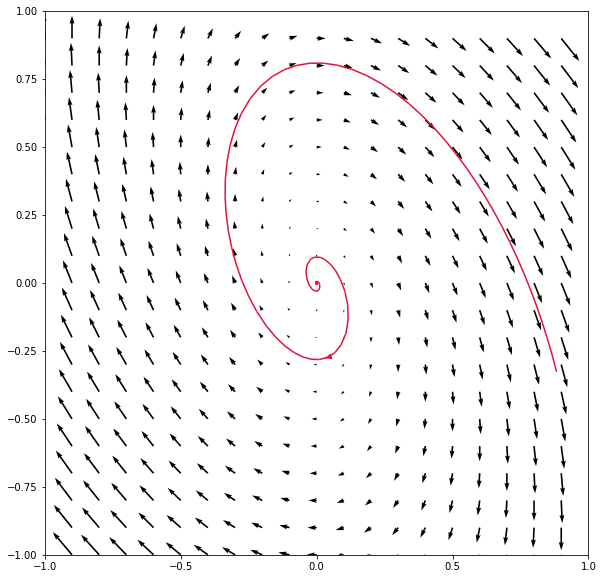

In [7]:
#Define the parameters
alpha = 0.1
A = np.array([[alpha,alpha],[-1/4,0]])

draw_phase_portrait(A)

# Unstable node

 ## An unstable node equilibrium is when the eigenvalues are both real and the real part of both eigenvalues is positive

[0.5 0.5]


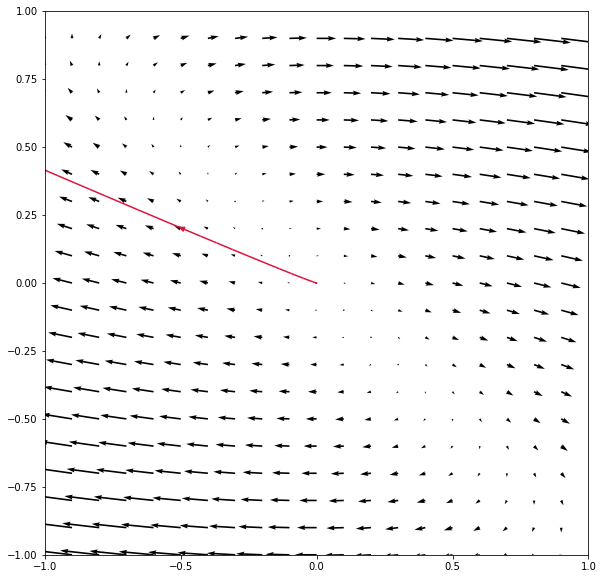

In [8]:
#Define the parameters
alpha = 1
A = np.array([[alpha,alpha],[-1/4,0]])

draw_phase_portrait(A)

# stable node

 ## A stable node equilibrium is when the eigenvalues are both real and the real part of both eigenvalues is negative

[-0.5 -0.5]


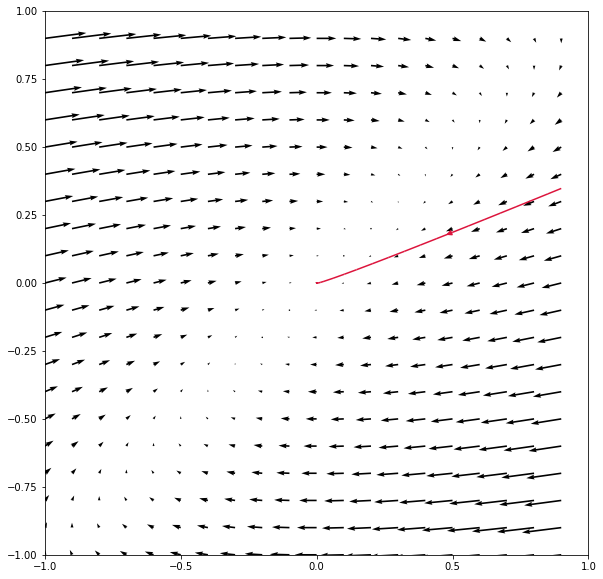

In [9]:
#Define the parameters
alpha = 1
A = np.array([[-alpha,alpha],[-1/4,0]])

draw_phase_portrait(A)

# Stable focus

 ## A stable focus equilibrium is when the eigenvalues are both complex and the real part of both eigenvalues is negative

[-0.2+0.24494897j -0.2-0.24494897j]


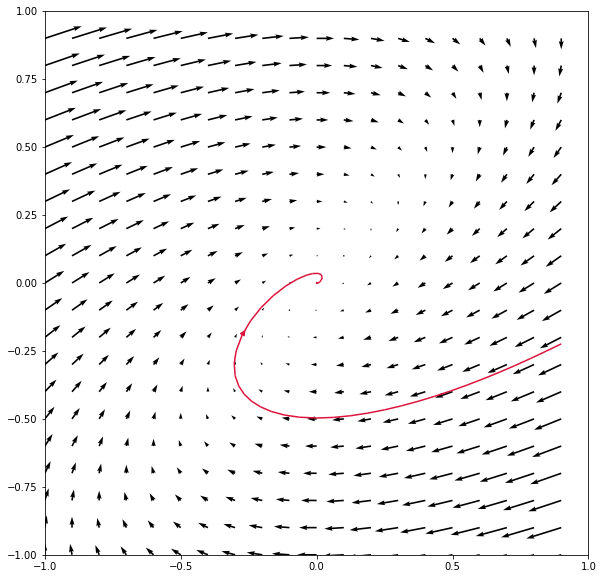

In [10]:
#Define the parameters
alpha = 0.4
A = np.array([[-alpha,alpha],[-1/4,0]])

draw_phase_portrait(A)

# Saddle

## A Saddle is when the eigenvalues are both real and one eigenvalue is positive while the other one is negative

[-0.57416574  0.17416574]


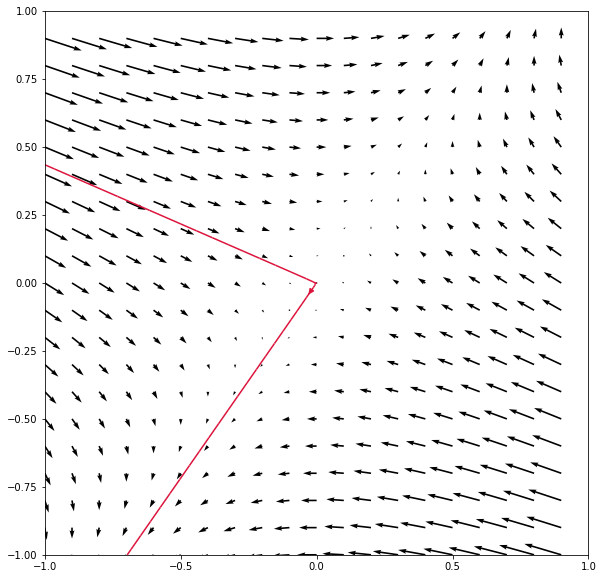

In [11]:
#Define the parameters
alpha = 0.4
A = np.array([[-alpha,alpha],[+1/4,0]])

draw_phase_portrait(A)